In [10]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [11]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False)

In [12]:
n_games=1000
win_pct=[]
scores=[]

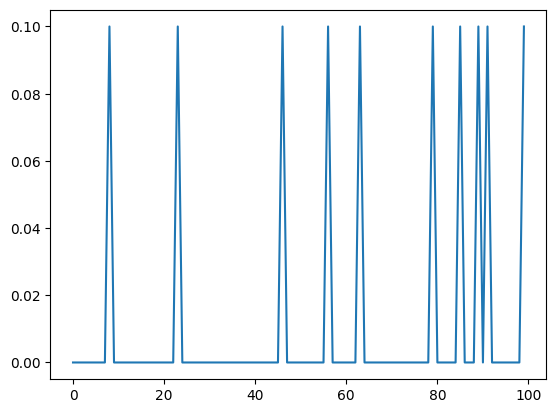

In [13]:
for i in range(n_games):
    done=False
    obs=env.reset()
    score=0
    while not done:
        action = env.action_space.sample()
        obs, reward, done, trunc, info = env.step(action)
        score += reward
    scores.append(score)
    
    if i%10==0:
        average = np.mean(scores[-10:])
        win_pct.append(average)
plt.plot(win_pct)
plt.show()

# Create a policy

In [17]:
# Left = 0, Down =1, RIght =2, UP = 3
policy = {0:1, 1:2, 2:1, 3:0, 4:1, 6:1, 8:2, 9:1, 10:1, 13:2, 14:2}

In [36]:
env = gym.make('FrozenLake-v1')

n_games=1000
win_pct=[]
scores=[]

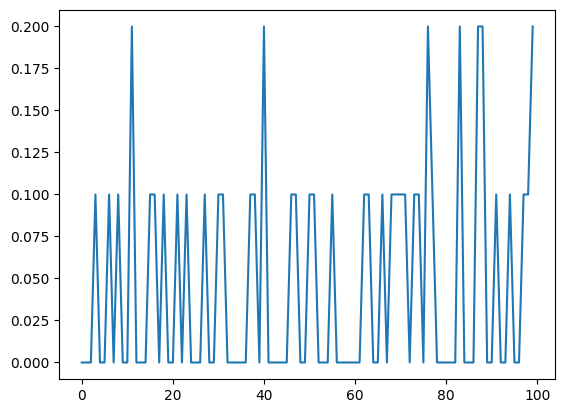

In [37]:
#win_pct=[]
for i in range(n_games):
    done=False
    obs=env.reset()
    score=0
    #print(obs[0])
    obs=obs[0]
    while not done:
        
        action = policy[obs]
        obs, reward, done, trunc, info = env.step(action)
        score += reward
    scores.append(score)
    
    if i%10==0:
        average = np.mean(scores[-10:])
        win_pct.append(average)
plt.plot(win_pct)
plt.show()

In [ ]:
policy(0)

In [ ]:
obs=env.reset()

In [ ]:
int(obs[0])

# Temporal DIfference Learning

In [93]:
class Agent():
    def __init__(self,lr,gamma,n_actions,n_states,eps_start, eps_end, eps_dec):
        self.lr= lr
        self.gamma = gamma
        self.n_actions = n_actions
        self.n_states = n_states
        self.epsilon = eps_start
        self.eps_min = eps_end
        self.eps_dec = eps_dec
        
        self.Q = {}
        
        self.init_Q()
    
    def init_Q(self):
        for state in range(self.n_states):
            for action in range(self.n_actions):
                self.Q[(state,action)]=0.0
    
    def choose_action(self,state):
        if np.random.random() < self.epsilon:
            action = np.random.choice([i for i in range(self.n_actions)])
        else:
            actions = np.array([self.Q[(state,a)] for a in range(self.n_actions)])
            
            action = np.argmax(actions)
        return action
    
    def decrement_epsilon(self):
        self.epsilon = self.epsilon*self.eps_dec if self.epsilon>self.eps_min else self.eps_min
    
    def learn(self, state, action, reward, state_):
        actions = np.array([self.Q[(state_,a)] for a in range(self.n_actions)])
        a_max = np.argmax(actions)
        #print(a_max)
        #print(state)
        self.Q[(state,action)] += self.lr*(reward+self.gamma*self.Q[(state_, a_max)]-self.Q[(state,action)])
        #print(action, reward, self.gamma, state_, a_max)
        #print(self.lr*(reward+self.gamma*self.Q[(state_, a_max)]))
        #print("OK")
        #print(self.Q[(state,action)])
        #self.Q[(self,action)] += self.lr*(reward+self.gamma*self.Q[(state_, a_max)])
        self.decrement_epsilon()

episode : 0, win_pct : 0.0, epsilon : 0.9999970000037502
episode : 1000, win_pct : 0.0, epsilon : 0.9962087042295723
episode : 2000, win_pct : 0.0, epsilon : 0.9922491916880322
episode : 3000, win_pct : 0.0, epsilon : 0.9883306186669633
episode : 4000, win_pct : 0.03, epsilon : 0.9846382108905481
episode : 5000, win_pct : 0.0, epsilon : 0.9809115321120275
episode : 6000, win_pct : 0.01, epsilon : 0.9771994467430598
episode : 7000, win_pct : 0.0, epsilon : 0.9735252601841301
episode : 8000, win_pct : 0.01, epsilon : 0.9698905900197454
episode : 9000, win_pct : 0.02, epsilon : 0.9661989548313761
episode : 10000, win_pct : 0.01, epsilon : 0.9625815303687523
episode : 11000, win_pct : 0.01, epsilon : 0.958856346421483
episode : 12000, win_pct : 0.03, epsilon : 0.95510546362873
episode : 13000, win_pct : 0.03, epsilon : 0.9513478480781759
episode : 14000, win_pct : 0.0, epsilon : 0.9478049816986306
episode : 15000, win_pct : 0.0, epsilon : 0.9441147959298347
episode : 16000, win_pct : 0.02,

episode : 133000, win_pct : 0.02, epsilon : 0.5530550978217024
episode : 134000, win_pct : 0.04, epsilon : 0.5499564699518698
episode : 135000, win_pct : 0.06, epsilon : 0.5467803282696823
episode : 136000, win_pct : 0.02, epsilon : 0.5437576366506952
episode : 137000, win_pct : 0.04, epsilon : 0.5406340542435168
episode : 138000, win_pct : 0.1, epsilon : 0.5376364691614725
episode : 139000, win_pct : 0.03, epsilon : 0.5345988339152714
episode : 140000, win_pct : 0.07, epsilon : 0.5315855376052734
episode : 141000, win_pct : 0.07, epsilon : 0.5283429606523701
episode : 142000, win_pct : 0.07, epsilon : 0.5250939074821401
episode : 143000, win_pct : 0.08, epsilon : 0.5218275224033294
episode : 144000, win_pct : 0.07, epsilon : 0.5185881977163802
episode : 145000, win_pct : 0.07, epsilon : 0.5156032701348917
episode : 146000, win_pct : 0.04, epsilon : 0.5124128316089137
episode : 147000, win_pct : 0.12, epsilon : 0.5091168766188919
episode : 148000, win_pct : 0.07, epsilon : 0.5060920697

episode : 263000, win_pct : 0.2, epsilon : 0.196847609348973
episode : 264000, win_pct : 0.24, epsilon : 0.19468402700857673
episode : 265000, win_pct : 0.33, epsilon : 0.19253199876118704
episode : 266000, win_pct : 0.25, epsilon : 0.19048203098298896
episode : 267000, win_pct : 0.32, epsilon : 0.18840018833989297
episode : 268000, win_pct : 0.25, epsilon : 0.18625847488550598
episode : 269000, win_pct : 0.26, epsilon : 0.18426820944490865
episode : 270000, win_pct : 0.33, epsilon : 0.1822508169630732
episode : 271000, win_pct : 0.31, epsilon : 0.18023424225750997
episode : 272000, win_pct : 0.36, epsilon : 0.17818054747529488
episode : 273000, win_pct : 0.24, epsilon : 0.17609785677812667
episode : 274000, win_pct : 0.22, epsilon : 0.17404882129625612
episode : 275000, win_pct : 0.37, epsilon : 0.17204883124925593
episode : 276000, win_pct : 0.29, epsilon : 0.1699889332025013
episode : 277000, win_pct : 0.29, epsilon : 0.16796150783538702
episode : 278000, win_pct : 0.25, epsilon : 0

episode : 392000, win_pct : 0.57, epsilon : 0.02863813986170723
episode : 393000, win_pct : 0.64, epsilon : 0.028114343372365472
episode : 394000, win_pct : 0.62, epsilon : 0.02760081722261991
episode : 395000, win_pct : 0.69, epsilon : 0.02707753390886389
episode : 396000, win_pct : 0.68, epsilon : 0.0265806331192801
episode : 397000, win_pct : 0.64, epsilon : 0.0260965042295626
episode : 398000, win_pct : 0.67, epsilon : 0.025595072767590182
episode : 399000, win_pct : 0.69, epsilon : 0.025113909555484062
episode : 400000, win_pct : 0.62, epsilon : 0.024632934623471672
episode : 401000, win_pct : 0.69, epsilon : 0.024176590945187246
episode : 402000, win_pct : 0.58, epsilon : 0.02371490714522557
episode : 403000, win_pct : 0.66, epsilon : 0.023275419327083678
episode : 404000, win_pct : 0.66, epsilon : 0.022850530520492855
episode : 405000, win_pct : 0.68, epsilon : 0.022402091603193404
episode : 406000, win_pct : 0.66, epsilon : 0.021970954362182184
episode : 407000, win_pct : 0.65,

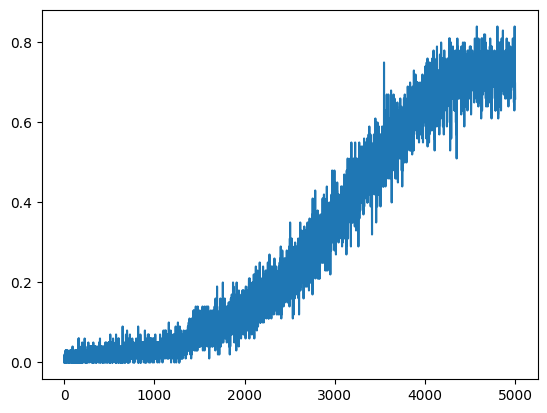

In [95]:
env = gym.make('FrozenLake-v1')
agent = Agent(lr=0.001, gamma=0.9, eps_start=1.0, eps_end=0.01, eps_dec=0.9999995, n_actions=4, n_states=16)
scores = []
win_pct_list = []
n_games =500000

for i in range(n_games):
    done=False
    observation = env.reset()
    observation = observation[0]
    score=0
    while not done:
        #print(observation)
        action = agent.choose_action(observation)
        observation_, reward, done,  trunc, info =env.step(action)
        #print(observation_, action, reward, observation)
        agent.learn(observation, action, reward, observation_)
        score+= reward
        observation = observation_
    scores.append(score)
    if i%100 ==0:
        win_pct = np.mean(scores[-100:])
        win_pct_list.append(win_pct)
        if i%1000 == 0:
            print("episode : {}, win_pct : {}, epsilon : {}".format(i, win_pct, agent.epsilon))
plt.plot(win_pct_list)
plt.show()

In [90]:
agent.Q

{(0, 0): 0.0,
 (0, 1): 0.0,
 (0, 2): 0.0,
 (0, 3): 0.0,
 (1, 0): 0.0,
 (1, 1): 0.0,
 (1, 2): 0.0,
 (1, 3): 0.0,
 (2, 0): 0.0,
 (2, 1): 0.0,
 (2, 2): 0.0,
 (2, 3): 0.0,
 (3, 0): 0.0,
 (3, 1): 0.0,
 (3, 2): 0.0,
 (3, 3): 0.0,
 (4, 0): 0.0,
 (4, 1): 0.0,
 (4, 2): 0.0,
 (4, 3): 0.0,
 (5, 0): 0.0,
 (5, 1): 0.0,
 (5, 2): 0.0,
 (5, 3): 0.0,
 (6, 0): 0.0,
 (6, 1): 0.0,
 (6, 2): 0.0,
 (6, 3): 0.0,
 (7, 0): 0.0,
 (7, 1): 0.0,
 (7, 2): 0.0,
 (7, 3): 0.0,
 (8, 0): 0.0,
 (8, 1): 0.0,
 (8, 2): 0.0,
 (8, 3): 0.0,
 (9, 0): 0.0,
 (9, 1): 0.0,
 (9, 2): 0.0,
 (9, 3): 0.0,
 (10, 0): 0.0,
 (10, 1): 0.0,
 (10, 2): 0.0,
 (10, 3): 0.0,
 (11, 0): 0.0,
 (11, 1): 0.0,
 (11, 2): 0.0,
 (11, 3): 0.0,
 (12, 0): 0.0,
 (12, 1): 0.0,
 (12, 2): 0.0,
 (12, 3): 0.0,
 (13, 0): 0.0,
 (13, 1): 0.0,
 (13, 2): 0.0,
 (13, 3): 0.0,
 (14, 0): 0.0,
 (14, 1): 0.0,
 (14, 2): 0.0,
 (14, 3): 0.0,
 (15, 0): 0.0,
 (15, 1): 0.0,
 (15, 2): 0.0,
 (15, 3): 0.0}